In [1]:
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import scipy.stats as stats
import csv
import os

from statsmodels.stats.multicomp import MultiComparison
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR


In [2]:
#carregando dados
# data = pd.read_csv('CIIS2020/data/banco_por_data.csv')
file_name = '~/git/DRC/CIIS2020/data/banco_por_data.csv' 
data = pd.read_csv(file_name, sep = ';', encoding = "ISO-8859-1", low_memory = False).drop(['Unnamed: 0'], axis=1)

In [3]:
#separar em um array os index de 2010 e do primeiro semestre de 2011
index_1_2011 =[]
for index in range(len(data)):
    aux = data['DATA'][index].split("-")
    ano = aux[2]
    mes =aux[1]
    if ano=='10':
        index_1_2011.append(index)
    elif ano=='11':
        if mes=='Jan' or mes=='Feb' or mes=='Mar' or mes=='Apr' or mes=='Jun':
            index_1_2011.append(index)

#separar em um array os index do seundo semestre de 2011
# index_2_2011 =[]
# for index in range(len(data)):
#     aux = data['DATA'][index].split("-")
#     ano = aux[2]
#     mes =aux[1]
#     if ano=='11':
#         if mes=='Jul' or mes=='Aug' or mes=='Sep' or mes=='Oct' or mes=='Nov' or mes=='Dec':
#             index_2_2011.append(index)
   
            

In [4]:
#Separar em dataframes diferentes por ano 
ind_1_2011 = [i for i in range(len(index_1_2011))]
exames_1_2011 = pd.DataFrame(columns=data.keys(), index=np.array(ind_1_2011))
id_ultimo_1_2011=0


for id_exames in index_1_2011:
    exames_1_2011.loc[id_ultimo_1_2011]= data.loc[id_exames]
    id_ultimo_1_2011+=1
    
exames_1_2011.replace(to_replace=[0,'0','0.0',''], value= np.nan, inplace=True)
exames_1_2011['Raça'].replace(to_replace=['Branca','Parda','Preta','Indigena','Amarela'],value=[1,2,3,4,5], inplace=True)  
exames_1_2011['Codsexo'].replace(to_replace=['Feminino','Masculino'],value=[1,2],inplace=True)
exames_1_2011['sedentario'].replace(to_replace=['Não','Sim'],value=[0,1],inplace=True)
exames_1_2011['etilismo'].replace(to_replace=['Ex','Sim'],value=[0,1],inplace=True)
exames_1_2011['tabagismo'].replace(to_replace=['Ex','Sim'],value=[0,1],inplace=True)
exames_1_2011['insulina'].replace(to_replace=['Não','Sim'],value=[0,1],inplace=True)
#Transformando o estagio_eq em int
for indice in range(len(exames_1_2011)):
    if type(exames_1_2011['ESTAGIO_EQ_1_2011'][indice]) != float:
        estagio = exames_1_2011['ESTAGIO_EQ_1_2011'][indice].split(" ")[1]
        if estagio == '1':
            exames_1_2011['ESTAGIO_EQ_1_2011'][indice]=1
        elif estagio=='2':
             exames_1_2011['ESTAGIO_EQ_1_2011'][indice]=2
        elif estagio=='3a':
             exames_1_2011['ESTAGIO_EQ_1_2011'][indice]=31
        elif estagio=='3b':
             exames_1_2011['ESTAGIO_EQ_1_2011'][indice]=32
        elif estagio=='4':
             exames_1_2011['ESTAGIO_EQ_1_2011'][indice]=4
        elif estagio=='5':
             exames_1_2011['ESTAGIO_EQ_1_2011'][indice]=5
#transformando o classe_imc em int
for indice in range(len(exames_1_2011)):
    if type(exames_1_2011['classe_imc'][indice]) != float:
        imc = exames_1_2011['classe_imc'][indice].split(" ")[1]
        if imc == 'Muito abaixo do peso)':
             exames_1_2011['classe_imc'][indice]=1
        elif imc == 'Abaixo do peso)':
             exames_1_2011['classe_imc'][indice]=2
        elif imc == 'Peso normal)':
             exames_1_2011['classe_imc'][indice]=3
        elif imc == 'Acima do peso)':
             exames_1_2011['classe_imc'][indice]=4
        elif imc == 'Obesidade I)':
             exames_1_2011['classe_imc'][indice]=5
        elif imc == 'Obesidade II - severa)':
             exames_1_2011['classe_imc'][indice]=6
        elif imc == 'Obesidade III - mórbida)':
             exames_1_2011['classe_imc'][indice]=7
                
#pegando só os valores float e int
exames_1_2011= exames_1_2011.select_dtypes(include = ['float64', 'int64'])

# #Segundo semestre de 2011
# ind_2_2011 = [i for i in range(len(index_2_2011))]
# exames_2_2011 = pd.DataFrame(columns=data.keys(), index=np.array(ind_2_2011))
# id_ultimo_2_2011=0


# for id_exames in index_2_2011:
#     exames_2_2011.loc[id_ultimo_2_2011]= data.loc[id_exames]
#     id_ultimo_2_2011+=1
    
# exames_2_2011.replace(to_replace=[0,'0','0.0',''], value= np.nan, inplace=True)
# exames_2_2011['Raça'].replace(to_replace=['Branca','Parda','Preta','Indigena','Amarela'],value=[1,2,3,4,5], inplace=True)  
# exames_2_2011['Codsexo'].replace(to_replace=['Feminino','Masculino'],value=[1,2],inplace=True)
# exames_2_2011['sedentario'].replace(to_replace=['Não','Sim'],value=[0,1],inplace=True)
# exames_2_2011['etilismo'].replace(to_replace=['Ex','Sim'],value=[0,1],inplace=True)
# exames_2_2011['tabagismo'].replace(to_replace=['Ex','Sim'],value=[0,1],inplace=True)
# exames_2_2011['insulina'].replace(to_replace=['Não','Sim'],value=[0,1],inplace=True)
# #Transformando o estagio_eq em int
# for indice in range(len(exames_2_2011)):
#     if type(exames_2_2011['ESTAGIO_EQ_2_2011'][indice]) != float:
#         estagio = exames_2_2011['ESTAGIO_EQ_2_2011'][indice].split(" ")[1]
#         if estagio == '1':
#             exames_2_2011['ESTAGIO_EQ_2_2011'][indice]=1
#         elif estagio=='2':
#              exames_2_2011['ESTAGIO_EQ_2_2011'][indice]=2
#         elif estagio=='3a':
#              exames_2_2011['ESTAGIO_EQ_2_2011'][indice]=31
#         elif estagio=='3b':
#              exames_2_2011['ESTAGIO_EQ_2_2011'][indice]=32
#         elif estagio=='4':
#              exames_2_2011['ESTAGIO_EQ_2_2011'][indice]=4
#         elif estagio=='5':
#              exames_2_2011['ESTAGIO_EQ_2_2011'][indice]=5
# #transformando o classe_imc em int
# for indice in range(len(exames_2_2011)):
#     if type(exames_2_2011['classe_imc'][indice]) != float:
#         imc = exames_2_2011['classe_imc'][indice].split(" ")[1]
#         if imc == 'Muito abaixo do peso)':
#              exames_2_2011['classe_imc'][indice]=1
#         elif imc == 'Abaixo do peso)':
#              exames_2_2011['classe_imc'][indice]=2
#         elif imc == 'Peso normal)':
#              exames_2_2011['classe_imc'][indice]=3
#         elif imc == 'Acima do peso)':
#              exames_2_2011['classe_imc'][indice]=4
#         elif imc == 'Obesidade I)':
#              exames_2_2011['classe_imc'][indice]=5
#         elif imc == 'Obesidade II - severa)':
#              exames_2_2011['classe_imc'][indice]=6
#         elif imc == 'Obesidade III - mórbida)':
#              exames_2_2011['classe_imc'][indice]=7
                
# #pegando só os valores float e int
# exames_2_2011= exames_2_2011.select_dtypes(include = ['float64', 'int64'])



/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_lau

In [5]:
#arrumando e retirando colunas 
exames_1_2011.drop(columns = ['RendaSM','RendaFamiliarSM','Id','DN'],inplace=True,errors='ignore')
exames_1_2011.drop(columns = [
                    'Id',
                    'TamFamilia',
                    'RendaFamiliarSM',
                    'filtro',
#                     'DRC_1_2011',
                    'DRC_2_2011',
                    'DRC_1_2012',
                    'DRC_2_2012',
                    'DRC_1_2013',
                    'DRC_2_2013',
                    'DRC_1_2014',
                    'DRC_2_2014',
#                     'HAS_1_2011',
                    'HAS_2_2011',
                    'HAS_1_2012',
                    'HAS_2_2012',
                    'HAS_1_2013',
                    'HAS_2_2013',
                    'HAS_1_2014',
                    'HAS_2_2014',
#                     'DM_1_2011',
                    'DM_2_2011',
                    'DM_1_2012',
                    'DM_2_2012',
                    'DM_1_2013',
                    'DM_2_2013',
                    'DM_1_2014',
                    'DM_2_2014',
#                     'Creatinina_1_2011',
                    'Creatinina_2_2011',
                    'Creatinina_1_2012',
                    'Creatinina_2_2012',
                    'Creatinina_1_2013',
                    'Creatinina_2_2013',
                    'Creatinina_1_2014',
                    'Creatinina_2_2014',
                    'TFG_1_2011',
#                     'TFG_1_2011_EQ',
                    'TFG_2_2011',
                    'TFG_2_2011_EQ',
                    'TFG_1_2012',
                    'TFG_1_2012_EQ',
                    'TFG_2_2012',
                    'TFG_2_2012_EQ',
                    'TFG_1_2013',
                    'TFG_1_2013_EQ',
                    'TFG_2_2013',
                    'TFG_2_2013_EQ',
                    'TFG_1_2014',
                    'TFG_1_2014_EQ',
                    'TFG_2_2014',
                    'TFG_2_2014_EQ',
                    'CREATININAI',
                    'CREATININAF'],inplace=True,errors='ignore')



In [8]:
exames_1_2011.keys()

Index(['Idade', 'Codsexo', 'Raça', 'pesoi', 'pesof', 'Alt', 'sedentario',
       'etilismo', 'tabagismo', 'consultasDM',
       ...
       'SodioSericoF', 'CKI', 'CKF', 'UreiaI', 'UreiaF', 'DRC_1_2011',
       'HAS_1_2011', 'DM_1_2011', 'Creatinina_1_2011', 'TFG_1_2011_EQ'],
      dtype='object', length=117)

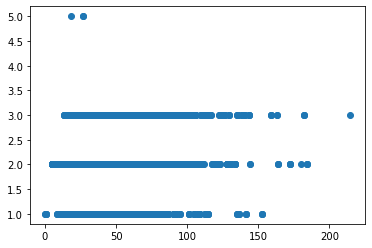

In [13]:
plt.scatter(exames_1_2011['TFG_1_2011_EQ'],exames_1_2011['Raça'])

### Data preparation

In [6]:
#DATA PREPARATION
#x1 são todas as variáveis sem o meu objetivo que é o EQ, tirei todos os exames que não foram relizados 1_2011
X1 = exames_1_2011.drop(columns='TFG_1_2011_EQ')
X1 = X1.replace(np.nan,0)
y1 = exames_1_2011['TFG_1_2011_EQ'].replace(np.nan,0)
#colocando na mesma escala
sc_X = StandardScaler()
sc_y = StandardScaler()
X1 = sc_X.fit_transform(X1)
y1 = np.array(y1).reshape(-1,1)
y1 = sc_y.fit_transform(y1)

xtrain, xtest, ytrain, ytest = train_test_split(X1, y1, test_size=0.70,random_state= 20200301)

### Models

In [7]:
#Regression Model
regression=LinearRegression(normalize=[True,False]).fit(xtrain,ytrain)
#Elastic Net
elastic=ElasticNet(normalize=[True,False],alpha= 0.004).fit(xtrain, ytrain)#alpha=0.01
#SVR model
regressor = SVR(kernel='rbf').fit(xtrain,ytrain)

/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Estrutura para aplicar os modelos

In [15]:
#lista com os modelos
lista_parametros = [regression, elastic, regressor]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize=[True, False])
R2:-544311873260381001558133005987978030659365691585462272.000, MSE:21197223236194045595222016.00, RMSE:4604044226133.59


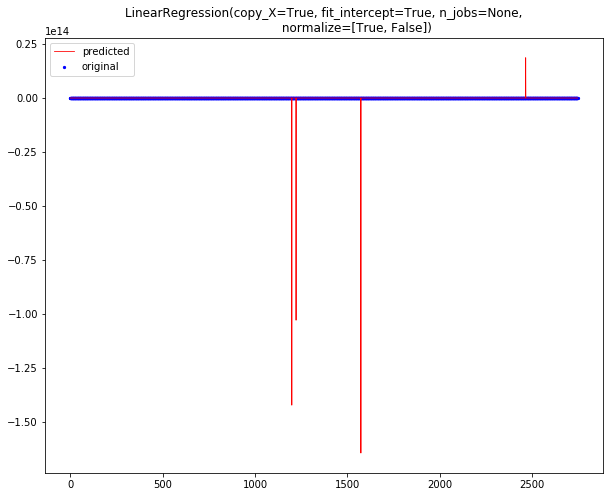

ElasticNet(alpha=0.004, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=[True, False], positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)
R2:0.105, MSE:0.94, RMSE:0.97


/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.00379269019073225}
best:0.8699721755313214


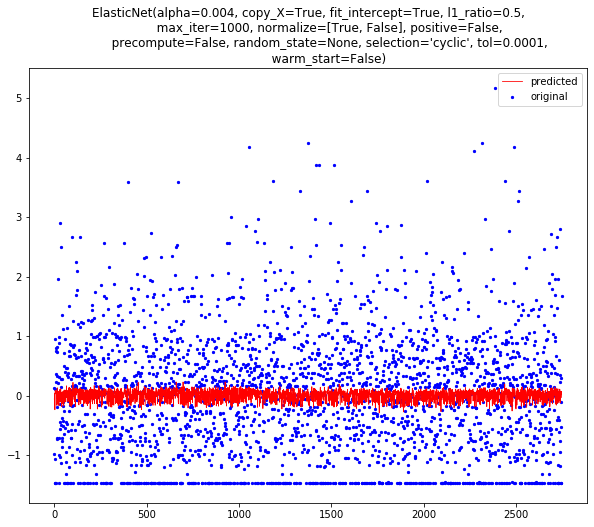

/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gabic9814/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will chan

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2:0.200, MSE:0.79, RMSE:0.89


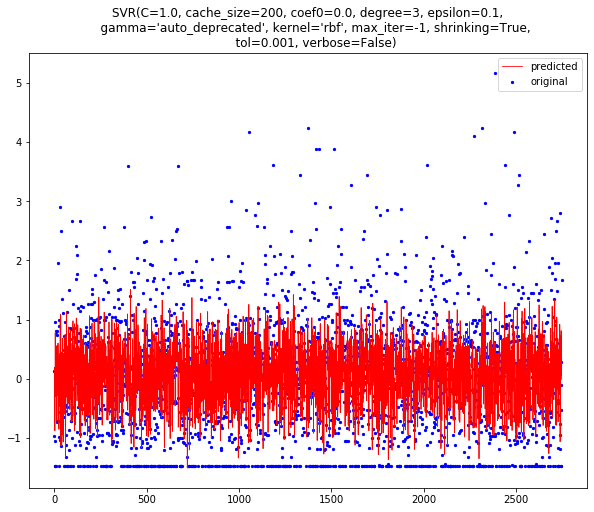

In [16]:
for modelo in lista_parametros:
    ypred = cross_val_predict(modelo,xtest,ytest,cv=5)
    score = modelo.score(xtest, ytest)
    mse = mean_squared_error(ytest, ypred)
    print(str(modelo))
    print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, mse, np.sqrt(mse)))
    if modelo != regression and modelo != regressor:
        #Achando melhores parâmetros
        search=GridSearchCV(estimator=modelo,param_grid={'alpha':np.logspace(-5,2,20)},
                                                          scoring='neg_mean_squared_error',
                                                          n_jobs=1,refit=True,cv=5)
        search.fit(xtrain,ytrain)
        print(search.best_params_)

        print('best:'+str(abs(search.best_score_)))
    
    plt.figure(figsize=(10,8))
    x_ax = range(len(xtest))
    plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
    plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
    plt.title(str(modelo))
    plt.legend()
    plt.savefig(str(modelo).split("(")[0])
    plt.show()
    